<a href="https://colab.research.google.com/github/Sompote/RIC_predict/blob/main/RIC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd



df = pd.read_excel('/content/drive/MyDrive/RIC/results.xlsx')
data=np.array(df)
X=data[:,1:8]
y=data[:,12:17]


In [27]:
df

,depth,1,2,3,4,5,6,blow,fine,Unnamed: 9,after RIC,1.1,2.1,3.1,4.1,5.1,6.1
0,NaN,3,2,8,9,5,5,50,25,NaN,NaN,7,3,4,5,7,10
1,NaN,3,2,8,9,3,5,100,30,NaN,NaN,4,6,8,9,1,6
2,NaN,3,2,8,9,6,5,150,12,NaN,NaN,1,9,12,13,-5,2
3,NaN,3,2,8,9,3,5,200,49,NaN,NaN,4,12,16,17,-11,-2
4,NaN,3,2,8,9,2,5,250,20,NaN,NaN,5,15,20,21,-17,-6
5,NaN,3,2,8,9,2,5,300,15,NaN,NaN,4,18,24,25,-23,-10


In [28]:
data

array([[ nan,   3.,   2.,   8.,   9.,   5.,   5.,  50.,  25.,  nan,  nan,
          7.,   3.,   4.,   5.,   7.,  10.],
       [ nan,   3.,   2.,   8.,   9.,   3.,   5., 100.,  30.,  nan,  nan,
          4.,   6.,   8.,   9.,   1.,   6.],
       [ nan,   3.,   2.,   8.,   9.,   6.,   5., 150.,  12.,  nan,  nan,
          1.,   9.,  12.,  13.,  -5.,   2.],
       [ nan,   3.,   2.,   8.,   9.,   3.,   5., 200.,  49.,  nan,  nan,
          4.,  12.,  16.,  17., -11.,  -2.],
       [ nan,   3.,   2.,   8.,   9.,   2.,   5., 250.,  20.,  nan,  nan,
          5.,  15.,  20.,  21., -17.,  -6.],
       [ nan,   3.,   2.,   8.,   9.,   2.,   5., 300.,  15.,  nan,  nan,
          4.,  18.,  24.,  25., -23., -10.]])

In [29]:
X

array([[  3.,   2.,   8.,   9.,   5.,   5.,  50.],
       [  3.,   2.,   8.,   9.,   3.,   5., 100.],
       [  3.,   2.,   8.,   9.,   6.,   5., 150.],
       [  3.,   2.,   8.,   9.,   3.,   5., 200.],
       [  3.,   2.,   8.,   9.,   2.,   5., 250.],
       [  3.,   2.,   8.,   9.,   2.,   5., 300.]])

In [30]:
Y

array([[ 3.,  4.,  5.,  7., 10.],
       [ 6.,  8.,  9.,  1.,  6.]])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.9485 - val_loss: 3.7470
Epoch 2/100
1/1 [==============================] - 0s 52ms/step - loss: 0.9304 - val_loss: 3.6339
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 0.9123 - val_loss: 3.5120
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 0.8942 - val_loss: 3.3911
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 0.8761 - val_loss: 3.2710
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 0.8580 - val_loss: 3.1512
Epoch 7/100
1/1 [==============================] - 0s 52ms/step - loss: 0.8397 - val_loss: 3.0315
Epoch 8/100
1/1 [==============================] - 0s 72ms/step - loss: 0.8218 - val_loss: 2.9149
Epoch 9/100
1/1 [==============================] - 0s 58ms/step - loss: 0.8040 - val_loss: 2.7984
Epoch 10/100
1/1 [==============================] - 0s 77ms/step - loss: 0.7864 - val_loss: 2.6829
Epoch 11/100
1/1 [===

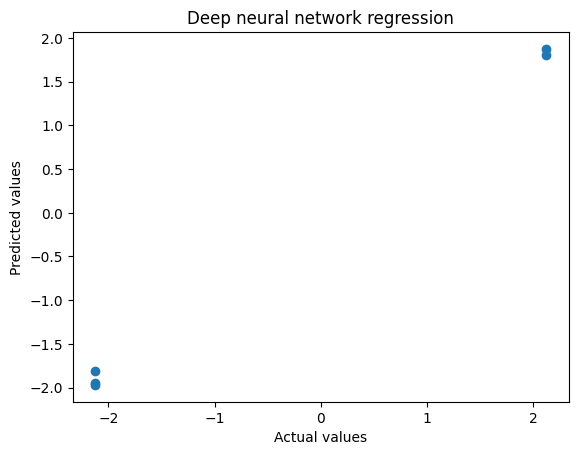

In [40]:
# Load and preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sc = StandardScaler()
sc_y=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

# Define neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1]))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
mse = model.evaluate(X_test, y_test)
print("Mean squared error:", mse)

def mape(actual, pred): 
  return np.mean(np.abs((actual - pred) / actual)) * 100
mape_cal=mape(y_test, y_pred)
print('mape =',mape_cal)

# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep neural network regression")
plt.show()

In [38]:
y_test

array([[-2.12132034, -2.12132034, -2.12132034,  2.12132034,  2.12132034]])

In [39]:
y_pred

array([[-1.8486233, -1.7227405, -1.6878079,  1.5102538,  1.3805296]],
      dtype=float32)